# PRÁCTICA 7 - Distribuciones Power Law

## 1. Distribución de grado
La distribución de grado pk nos da la probabilidad de que tomado un nodo al azar tenga grado k. Si en una red de N nodos, Nk nodos tienen grado k entonces podemos definir pk:

    pk=Nk/N

Para la siguiente red de ejemplo 1 se muestra su distribución de grado (tabla y como histograma).

En el caso de redes dirigidas, se definen dos distribuciones de grado, i.e. in-degree y out-degree.

## 2. Distribuciones Power Law

El siguiente documento extraído del libro de Barabasi (2012) introduce el concepto de distribución power law en redes. Lea el documento y trate de contestar a las siguientes preguntas:

### 2.1. Dadas las redes de la figura, ¿cuál de ellas presenta una propia scale-free?

La red morada, es la red con scale-free, ya que la distribucion de grados sigue una ley de potencia (Power Law), y esto lo podemos observar en la gráfica donde la red morada tiene una relacion funcional.

### 2.2. De los siguientes mecanismos, ¿cuál de ellos podría generar propiedad scale-free con más probabilidad?

* Un usuario crea una página web y añade un enlace a la página de un amigo.

* Un usuario crea una página web y añade un enlace a la página que le proporciona el primer resultado de la búsqueda en Google.

El segundo mecanismo, ya que el primer resultado de una búsqueda en Google está altamente conectado a otras redes, por lo que posee un gran número de enlaces.



## 3. Estudio de la distribucion de grado de una red

A continuación vamos a estudiar la distribución de grado de una red de routers de Internet mediante la librería Networkx de python. La librería Networkx no es apropiada para dibujar redes muy grandes como ésta, por lo tanto no intente visualizar la red completa.

El objetivo es comprobar que la distribución de grado de la red responde a una power law y tratar de encontrar el parámetro que la define. Veremos dos técnicas distintas.

### 3.1 Estadísticas
Calcule las siguientes estadísticas de la red:
* Número de nodos
* Número de enlaces
* Grado medio
* Grado máximo
* Grado mínimo

### 3.2 Histograma
Dibuje un histograma de la distribución de grado de la red. Dada una red, la probabilidad de encontrar un nodo con grado k se define como pk=Nk/N (siendo Nk el número de nodos con grado k). Le será útil la función: 

    matplotlib.pyplot.hist(x, bins, normed)

Cambie la escala de los ejes de lineal a logarítmica (ver funciones matplotlib.pyplot.yscale y xscale) y decida con qué escala se visualiza mejor la distribución de grado de esta red. Si la distribución muestra un significativo comportamiento lineal cuando la representamos en escala logarítmica, es probable que sea una distribución de power law.

### 3.3. Histograma con clase variable logarítmica
El histograma anterior supone un tamaño de clase constante.

Pero si la distribución de grado es power law, utilizar clases constantes puede producir ruido puesto que algunas de ellas, por ejemplo las de mayor grado, tienen muy pocos datos. 

Para resolver este problema podemos utilizar un tamaño de clase variable. Por ejemplo, una calse variable logarítmica.

tal que el tamaño de la n-ésima clase sea:

    2^n-1 > k > 2^n

Debemos normalizar la frecuencia del número de nodos que caen en cada clase dividiéndola por el tamaño de la clase correspondiente, que para la clase n-ésima sería:

    2^n - 2^(n-1)

Dibuje un nuevo histograma con clase variable logarítmica. En vez de utilizar la función matplotlib.hist que calcula y representa gráficamente un histograma, puede utilizar la función:

    numpy.histogram(a, bins, normed)

que calcula el número de datos [n1,n2,n3,...] que caen dentro de las clases definidas en la variable bins. Por ejemplo, para bins=[21, 22, 23, 24, 25,...] n1 define la frecuencia de valores contenida en el rango [2¹,2²), n2 define la frecuencia de valores contenida en el rango [2²,2³), y así sucesivamente. Después se puede dibujar un diagrama de barras para representar el histograma mediante la función:

    matplotlib.pyplot.bar(left, height, width)

donde podemos utilizar anchos para las barras variables mediante el argumento width para representar las clases variables logarítmicas.

### 3.4. Estimación parámetro de power Law

Nos interesa calcular el parámetro de power law. Es decir, suponemos que la distribución de grado responde a la siguiente función:

    pk ~ k^(-a)

donde el parámetro alfa define la power law. La forma más sencilla es ajustar un modelo de regresión lineal a los datos (transformados logarítmicamente), el parámetro de pendiente corresponderá al parámetro alfa de la power law:

    ln pk = -a ln k + c

Para ello podemos emplear la función:

    scipy.stats.linregress(x, y)

que calcula un modelo de regresión lineal, y nos devuelve los parámetros de la recta estimada, así como algunos estadísticos como el R2 o el p-valor del contraste de hipótesis de pendiente nula.

Estime el coeficiente α de la distribución de potencia (power law) que mejor se ajusta a la distribución de grado de la red, y muestre el valor de R^2 del ajuste y el p-valor.

### 3.5. Estimación mediante distribución acumulada

Otro método para calcular el parámetro de power law utiliza la distribución acumulada (Newman, 2010). Se define la función de distribución de grado acumulada como:

Dada una red, Pk se puede calcular como la suma de todos los nodos con grado mayor o igual a k, dividida por el número de nodos N. Una forma muy sencilla de obtener esta distribución es la siguiente, que no requiere calcular el tamaño de las clases de un histograma. Por ejemplo, para la red de ejemplo 1: 

* ordenamos de forma decreciente los grados de todos los nodos, 
* añadimos una columna de ranking del nodo en dicha ordenación, 
* y finalmente dividimos cada valor de ranking por el número total de nodos:

Para la red de routers, podemos  ajustar un modelo de regresión lineal a los datos (transformados logarítmicamente). En este caso el parámetro de pendiente del modelo está relacionado con el parámetro alfa de power law de la siguiente forma:

pendiente=-+1

Ya que al ser la función acumulada de una ley de potencia, el exponente responde a la fórmula:

    pk ~ k^(-a + 1)

Estime el coeficiente α de la distribución de potencia (power law) de acuerdo a este método, y muestre el valor de R2 del ajuste. Compare los resultados con los valores obtenidos anteriormente.


In [1]:
#Imports
import networkx as nx
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plt
import scipy.stats

### 3.1. Estadísticas


In [2]:
#Funcion para calcular las estadísticas de un grafo

def calculoEstadisticas (G):
    # Número de nodos
    num_nodos = G.number_of_nodes()

    # Número de enlaces
    num_enlaces = G.number_of_edges()

    # Grado medio
    grado_medio = sum(dict(G.degree()).values()) / num_nodos

    # Grado máximo
    grado_max = max(dict(G.degree()).values())

    # Grado mínimo
    grado_min = min(dict(G.degree()).values())

    print("Número de nodos:", num_nodos)
    print("Número de enlaces:", num_enlaces)
    print("Grado medio:", grado_medio)
    print("Grado máximo:", grado_max)
    print("Grado mínimo:", grado_min)

In [3]:
G = nx.read_gexf("internet_routers-22july06-2.gexf")
calculoEstadisticas(G)

Número de nodos: 22963
Número de enlaces: 48436
Grado medio: 4.218612550624918
Grado máximo: 2390
Grado mínimo: 1


### 3.2. Histograma

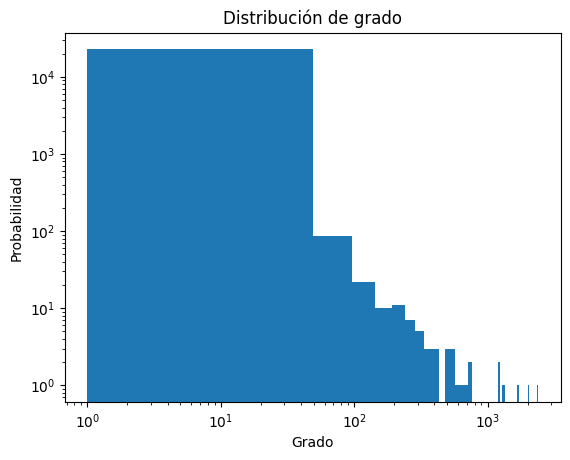

In [4]:
# Se obtienen los grados de todos los nodos en la red
grados = [grado for nodo, grado in G.degree()]

# Dibujamos el histograma
plt.hist(grados, bins=50)

# Cambiamos la escala de los ejes a logarítmica
plt.yscale('log')
plt.xscale('log')

# Etiquetas y título
plt.xlabel('Grado')
plt.ylabel('Probabilidad')
plt.title('Distribución de grado')

# Se muestra el gráfico
plt.show()

Se visualiza mejor con la escala logarítmica.

### 3.3. Histograma con clase variable logarítmica

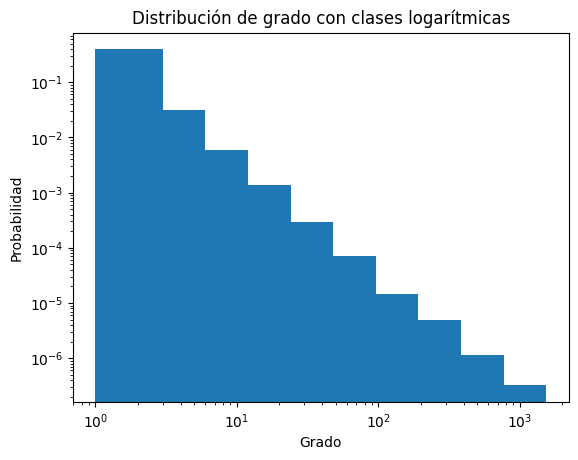

In [5]:
# Obtenemos los grados de todos los nodos en la red
grados = [grado for nodo, grado in G.degree()]

# Definimos las clases en una escala logarítmica
bins = 2**np.arange(1, np.log2(np.max(grados)))

# Calculamos las frecuencias
frecuencias, bins = np.histogram(grados, bins=bins, density=True)

# Calculamos los anchos de las barras para representar las clases variables logarítmicas
widths = bins[1:] - bins[:-1]

# Dibujamos el histograma
plt.bar(bins[:-1], frecuencias, width=widths)

# Cambiamos la escala de los ejes a logarítmica
plt.yscale('log')
plt.xscale('log')

# Etiquetas y título
plt.xlabel('Grado')
plt.ylabel('Probabilidad')
plt.title('Distribución de grado con clases logarítmicas')

# Muestra el gráfico
plt.show()

### 3.4. Estimación parámetro de power law

Coeficiente α: -2.1690359761735376
Valor de R^2: 0.9926339210999093
P-valor: 8.073970952291797e-10


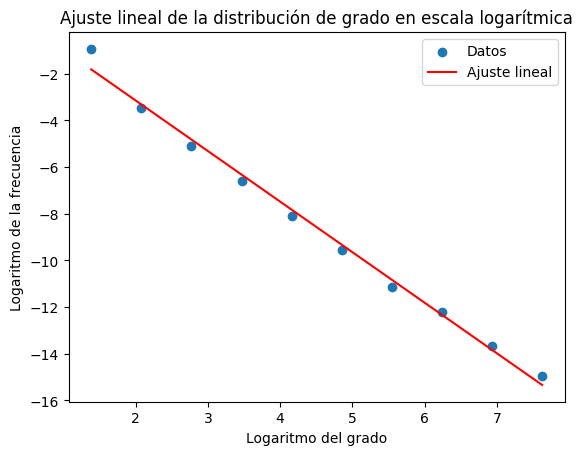

In [6]:
# Calculamos los logaritmos de los grados y las frecuencias
log_bins = np.log(bins[1:])
log_frecuencias = np.log(frecuencias + 1e-10)  # Agrega un pequeño valor para evitar tomar el logaritmo de cero

# Calculamos la regresión lineal
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(log_bins, log_frecuencias)

# Imprimimos los resultados
print(f"Coeficiente α: {slope}")
print(f"Valor de R^2: {r_value**2}")
print(f"P-valor: {p_value}")

# Dibujamos los datos
plt.scatter(log_bins, log_frecuencias, label='Datos')

# Dibujamos la línea de regresión
x = np.linspace(min(log_bins), max(log_bins), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Ajuste lineal')

# Etiquetas y título
plt.xlabel('Logaritmo del grado')
plt.ylabel('Logaritmo de la frecuencia')
plt.title('Ajuste lineal de la distribución de grado en escala logarítmica')

# Leyenda
plt.legend()

# Se muestra el gráfico
plt.show()

### 3.5. Estimacion mediante distribución acumulada

Coeficiente α: 2.2643462481003196
Valor de R^2: 0.9359490541967527
P-valor: 0.0


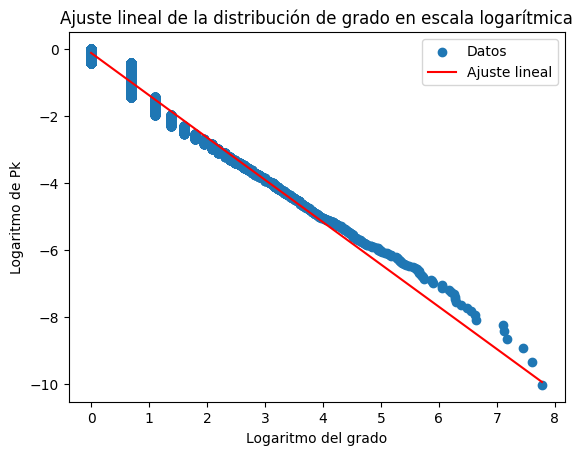

In [7]:
# Obtenemos los grados de todos los nodos en la red
grados = [grado for nodo, grado in G.degree()]

# Ordenamos los grados de forma decreciente
grados.sort(reverse=True)

# Añadimos una columna de ranking del nodo en dicha ordenación
ranking = np.arange(len(grados)) + 1

# Dividimos cada valor de ranking por el número total de nodos
Pk = ranking / len(grados)

# Calculamos los logaritmos de los grados y Pk
log_grados = np.log(grados)
log_Pk = np.log(Pk)

# Calculamos la regresión lineal
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(log_grados, log_Pk)

# Imprimimos los resultados
print(f"Coeficiente α: {-slope +1}")
print(f"Valor de R^2: {r_value**2}")
print(f"P-valor: {p_value}")

# Dibujamos los datos
plt.scatter(log_grados, log_Pk, label='Datos')

# Dibujamos la línea de regresión
x = np.linspace(min(log_grados), max(log_grados), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Ajuste lineal')

# Etiquetas y título
plt.xlabel('Logaritmo del grado')
plt.ylabel('Logaritmo de Pk')
plt.title('Ajuste lineal de la distribución de grado en escala logarítmica')

# Leyenda
plt.legend()

# Se muestra el gráfico
plt.show()